# Data Encoding

### Machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.

- Label Encoding or Ordinal Encoding
- One hot Encoding
- Dummy Encoding

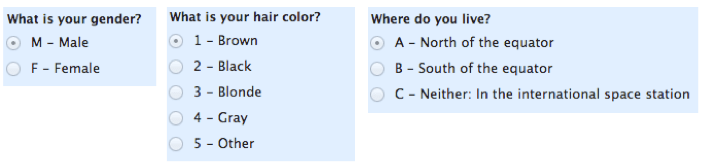
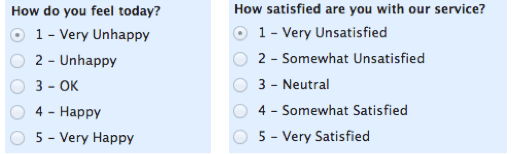

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('D://Files//hr.csv')
X = dataset.drop("Attrition",axis=1)
y = dataset["Attrition"]

In [77]:
dataset.head(2)

,EmployeeCount,EmployeeID,Department,JobRole,Attrition,Gender,Age,MaritalStatus,Education,EducationField,...,Hourlyrate,Income,Salaryhike,OverTime,Workex,YearsSinceLastPromotion,EmpSatisfaction,TrainingTimesLastYear,WorkLifeBalance,Performance_Rating
0,1,1,Sales,Sales Executive,Yes,Female,41,Single,College,Life Sciences,...,94,5993,11,Yes,8,0,Medium,0,Bad,Excellent
1,1,2,Research & Development,Research Scientist,No,Male,49,Married,Below College,Life Sciences,...,61,5130,23,No,10,1,High,3,Better,Outstanding


In [78]:
dataset["Education"].unique()

array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [20]:
X.columns

Index(['EmployeeCount', 'EmployeeID', 'Department', 'JobRole', 'Gender', 'Age',
       'MaritalStatus', 'Education', 'EducationField', 'BusinessTravel',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'Hourlyrate', 'Income',
       'Salaryhike', 'OverTime', 'Workex', 'YearsSinceLastPromotion',
       'EmpSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'Performance_Rating'],
      dtype='object')

In [26]:
y.head(2)

0    Yes
1     No
Name: Attrition, dtype: object

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [35]:
print(X)

[[1.0 1 'Sales' ... 0 'Bad' 'Excellent']
 [1.0 2 'Research & Development' ... 3 'Better' 'Outstanding']
 [1.0 4 'Research & Development' ... 3 'Better' 'Excellent']
 ...
 [1.0 2064 'Research & Development' ... 0 'Better' 'Outstanding']
 [1.0 2065 'Sales' ... 3 'Good' 'Excellent']
 [1.0 2068 'Research & Development' ... 3 'Best' 'Excellent']]


In [37]:
# concate df and X
dfOneHot = pd.DataFrame(X) 
df = pd.concat([dataset, dfOneHot], axis=1)


In [41]:
df.shape

(1470, 47)

In [ ]:
### Encoding the Dependent Variable

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [81]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [82]:
le = LabelEncoder()
dataset["MaritalStatus"] = le.fit_transform(dataset["MaritalStatus"])

In [83]:
dataset["MaritalStatus"].unique()

array([2, 1, 0], dtype=int64)

In [ ]:
pd.get_dummies()

In [70]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,3,4,5,6])], remainder='passthrough')
dataset= np.array(ct.fit_transform(dataset))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [72]:
dataset=pd.DataFrame(dataset)
dataset.head(2)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0,1,1,0,0,1,1,0,1,0,...,Very High,94,5993,11,Yes,8,0,Medium,0,Bad
1,0,1,1,0,0,1,1,0,1,0,...,Medium,61,5130,23,No,10,1,High,3,Better


In [75]:
dataset.columns

RangeIndex(start=0, stop=62, step=1)

In [53]:
dataset.head(2)

,EmployeeCount,EmployeeID,Department,JobRole,Attrition,Gender,Age,MaritalStatus,Education,EducationField,...,Hourlyrate,Income,Salaryhike,OverTime,Workex,YearsSinceLastPromotion,EmpSatisfaction,TrainingTimesLastYear,WorkLifeBalance,Performance_Rating
0,1,1,Sales,Sales Executive,Yes,Female,41,2,0.0,Life Sciences,...,94,5993,11,Yes,8,0,Medium,0,Bad,Excellent
1,1,2,Research & Development,Research Scientist,No,Male,49,1,0.0,Life Sciences,...,61,5130,23,No,10,1,High,3,Better,Outstanding
